## Final Project - Student Predictive Model

#### Imports

In [10]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap        
import numpy as np
import scipy as sp
import random
import pandas as pd
from math import sqrt
from sklearn import datasets
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression
import seaborn as sb

#### Import Data from CSV File

In [11]:
#Reading in Data
pre_processed_data = pd.read_csv('StudentsPerformance.csv', delimiter=',')
pre_processed_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Global Constants

In [1]:
PARAMETER_ORDER = ['gender', 'race_ethnicity', 'parent_education', 'lunch', 'test_prep', 'math_score', 'reading_score', 'writing_score']

#### Helper Functions

In [22]:
def simple_plot(name, x_lable, x,y_lable, y):
    plt.scatter(x,y)
    plt.title(name)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.show()
    
# Categorical to Numerical - Requires correct order - FIX  THIS
def convert_to_numerical(data):
    return [
        1,
        G_map[data['gender']],
        RE_map[data['race_ethnicity']],
        PE_map[data['parent_education']],
        L_map[data['lunch']],
        TP_map[data['test_prep']]
    ]


#### Category Mapping (Integer Mapping)

In [23]:
# Gender Mapping
G_integer_map = {
    'female' : 1,
    'male' : 0
}

# Race/Ethnicity Mapping
RE_integer_map = {
    'group A' : 0,
    'group B' : 1,
    'group C' : 2,
    'group D' : 3,
    'group E' : 4
}

# Parental Education Mapping
PE_integer_map = {
    'some college' :        0,
    'associate\'s degree' : 1,
    'high school' :         2,
    'some high school' :    3,
    'bachelor\'s degree' :  4,
    'master\'s degree' :    5
}

# Lunch Mapping
L_integer_map = {
    'standard' : 0,
    'free/reduced' : 1
}

# Test Prep Mapping

TP_integer_map = {
    'none' : 0,
    'completed' : 1
}

#### One Hot Encoding

In [2]:
# Gender Mapping
G_onehot_map = {
    'female' : [1, 0],
    'male' : [0, 1]
}

# Race/Ethnicity Mapping
RE_onehot_map = {
    'group A' : [1, 0, 0, 0, 0],
    'group B' : [0, 1, 0, 0, 0],
    'group C' : [0, 0, 1, 0, 0],
    'group D' : [0, 0, 0, 1, 0],
    'group E' : [0, 0, 0, 0, 1]
}

# Parental Education Mapping
PE_onehot_map = {
    'some college' :        [1, 0, 0, 0, 0, 0],
    'associate\'s degree' : [0, 1, 0, 0, 0, 0],
    'high school' :         [0, 0, 1, 0, 0, 0],
    'some high school' :    [0, 0, 0, 1, 0, 0],
    'bachelor\'s degree' :  [0, 0, 0, 0, 1, 0],
    'master\'s degree' :    [0, 0, 0, 0, 0, 1]
}

# Lunch Mapping
L_onehot_map = {
    'standard' : [1, 0],
    'free/reduced' : [0, 1]
}

# Test Prep Mapping

TP_onehot_map = {
    'none' : [1, 0],
    'completed' : [0, 1]
}

#### Binary Encoding

In [3]:
# Gender Mapping
G_binary_map = {
    'female' : [0],
    'male' : [1]
}

# Race/Ethnicity Mapping
RE_binary_map = {
    'group A' : [0, 0, 0],
    'group B' : [0, 0, 1],
    'group C' : [0, 1, 0],
    'group D' : [0, 1, 1],
    'group E' : [1, 0, 0]
}

# Parental Education Mapping
PE_binary_map = {
    'some college' :        [0, 0, 0],
    'associate\'s degree' : [0, 0, 1],
    'high school' :         [0, 1, 0],
    'some high school' :    [0, 1, 1],
    'bachelor\'s degree' :  [1, 0, 0],
    'master\'s degree' :    [1, 0, 1]
}

# Lunch Mapping
L_binary_map = {
    'standard' : [0],
    'free/reduced' : [1]
}

# Test Prep Mapping

TP_binary_map = {
    'none' : [0],
    'completed' : [1]
}

#### Visualization of Data

In [24]:
#Visualizing Data

#Pre-Processed Individual Data
math = np.array(pre_processed_data["math score"])
reading = np.array(pre_processed_data["reading score"])
writing = np.array(pre_processed_data['writing score'])
gender = np.array(pre_processed_data['gender'])
race_ethnicity = np.array(pre_processed_data['race/ethnicity'])
parent_education = np.array(pre_processed_data['parental level of education'])
lunch = np.array(pre_processed_data['lunch'])
test_prep = np.array(pre_processed_data['test preparation course'])

# Mapped Individual Data

mapped_gender = np.array([G_map[value] for value in gender])
mapped_race_ethnicity = np.array([RE_map[value] for value in race_ethnicity])
mapped_parent_education = np.array([PE_map[value] for value in parent_education])
mapped_lunch = np.array([L_map[value] for value in lunch])
mapped_test_prep = np.array([TP_map[value] for value in test_prep])

# Processed 
average_score = (math + reading + writing) / 3
intersect = np.ones(len(average_score))

# Mapped Data Matrix
mapped_data_matrix = np.column_stack((intersect, mapped_gender, 
                               mapped_race_ethnicity, 
                               mapped_parent_education, 
                               mapped_lunch, 
                               mapped_test_prep))

G_map[data['gender']],
        RE_map[data['race_ethnicity']],
        PE_map[data['parent_education']],
        L_map[data['lunch']],
        TP_map[data['test_prep']]

print(mapped_data_matrix)
reg = LinearRegression().fit(mapped_data_matrix, average_score)
converted1 = convert_to_numerical({'gender':'female', 
                                    'race_ethnicity':'group B', 
                                    'parent_education':'bachelor\'s degree', 
                                    'lunch':'free/reduced', 
                                    'test_prep':'none'})
print(converted1)
print(reg.predict(np.array([converted1])))

converted2 = convert_to_numerical({'gender':'male', 
                                    'race_ethnicity':'group A', 
                                    'parent_education':'associate\'s degree', 
                                    'lunch':'free/reduced', 
                                    'test_prep':'none'})
print(reg.predict(np.array([converted2])))


[[1. 1. 1. 4. 0. 0.]
 [1. 1. 2. 0. 0. 1.]
 [1. 1. 1. 5. 0. 0.]
 ...
 [1. 1. 2. 2. 1. 1.]
 [1. 1. 3. 0. 0. 1.]
 [1. 1. 3. 0. 1. 0.]]
[1, 1, 1, 4, 1, 0]
[59.64825551]
[52.58197253]


#### Visualizing a 2-Dimensional Plot With Classes (Classification)

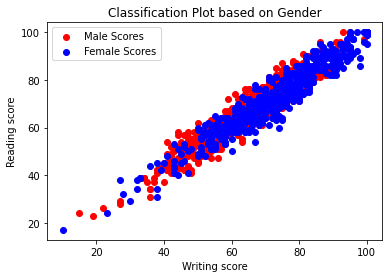

In [27]:
GENDER_COL = 0
RACE_COL = 1
PARENTAL_EDU_COL = 2
LUNCH_COL = 3
TEST_PREP_COL = 4
MATH_SCORE_COL = 5
READING_SCORE_COL = 6
WRITING_SCORE_COL = 7

# math = np.array(raw_data["math score"])
# reading = np.array(raw_data["reading score"])
# simple_plot(math, reading)

def class_plot(class_name, class1, class2, feature1, feature2):
    plt.scatter(df2[feature1][(class_name == class1) | (class_name == class1)],
            df2[feature2][(class_name == class1) | (class_name == class1)],
           color='red',
           label=class1.capitalize() + " Scores")
    plt.scatter(df2[feature1][class_name == class2],
            df2[feature2][class_name == class2],
           color='blue',
           label=class2.capitalize() + " Scores")

    plt.title("Classification Plot based on " + class_name.name.capitalize())
    plt.xlabel(feature1.capitalize())
    plt.ylabel(feature2.capitalize())
    plt.legend()
    
class_plot(pre_processed_data.gender, 'male', 'female', 'writing score', 'reading score')

